<img src="img/svds_logo.png" alt="SVDS" width="500" align="left">

# PyData San Francisco 2016
## Applied Time Series Econometrics in Python (and R) Tutorial
### Section 3: ARIMAX Models

### Topics in this section include 


  - 3.1 Model Estimation and Identification
  - 3.2 Model Diagnostic Checking
    * Define the stationary and invertible conditions for $ARIMA(p,d,q)$ models
  - 3.3 Model performance evaluation (in-sample fit)
  - 3.4 Forecasting and forecast evaluation 
  - 3.5 A few words on adding explanatory variables, its use cases, and its practical suggestions

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

import sys
import os

import pandas as pd
import numpy as np

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

<div class="alert alert-info">

** Read a series stored in a csv file. ** This is the same series we used in *Exercise 2*.
</div>

In [235]:
# Import the csv file containing the series for the analysis
# This is the file we just analyzed in Exercise 2

filename_ts = 'data/export_min.csv'
ts_df = pd.read_csv(filename_ts, index_col=0, parse_dates=[0], encoding='cp1252')

n_sample = ts_df.shape[0]

In [88]:
ts_df

,Time,INV,P_ac,DaySum [Wh],Status,Error,Pdc1 [W],Pdc2 [W],Pdc3 [W],Udc1 [V],Udc2 [V],Udc3 [V],Uac [V],INV.1,P_ac.1,DaySum [Wh].1,Status.1,Error.1,Pdc1 [W].1,Pdc2 [W].1,Pdc3 [W].1,Udc1 [V].1,Udc2 [V].1,Udc3 [V].1,Uac [V].1,INV.2,P_ac.2,DaySum [Wh].2,Status.2,Error.2,Pdc1 [W].2,Pdc2 [W].2,Pdc3 [W].2,Udc1 [V].2,Udc2 [V].2,Udc3 [V].2,Uac [V].2,INV.3,P_ac.3,DaySum [Wh].3,Status.3,Error.3,Pdc1 [W].3,Pdc2 [W].3,Udc1 [V].3,Udc2 [V].3,Uac [V].3,INV.4,P_ac.4,DaySum [Wh].4,...,Udc1 [V].5,Udc2 [V].5,Udc3 [V].4,Uac [V].5,INV.6,P_ac.6,DaySum [Wh].6,Status.6,Error.6,Pdc1 [W].6,Pdc2 [W].6,Pdc3 [W].5,Udc1 [V].6,Udc2 [V].6,Udc3 [V].5,Uac [V].6,INV.7,P_ac.7,DaySum [Wh].7,Status.7,Error.7,Pdc1 [W].7,Pdc2 [W].7,Udc1 [V].7,Udc2 [V].7,Uac [V].7,INV.8,P_ac.8,DaySum [Wh].8,Status.8,Error.8,Pdc1 [W].8,Pdc2 [W].8,Udc1 [V].8,Udc2 [V].8,Uac [V].8,INV.9,P_ac.9,DaySum [Wh].9,Status.9,Error.9,Pdc1 [W].9,Pdc2 [W].9,Udc1 [V].9,Udc2 [V].9,Temp [°C],Uac [V].9,Idc1 [mA],Idc2 [mA],Iac [mA]
#Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-18,16:45:00,1,2723,26237,3,0,927,986,984,361,371,367,226,2,2465,26047,3,0,643,990,991,318,369,373,226,3,2666,26326,3,0,823,998,998,329,373,370,225,4,3770,35457,3,0,2595,1325,499,495,229,5,2312,22999,...,494,494,0,226,7,2346,23168,3,0,1239,1230,0,484,487,0,226,8,3587,35138,3,0,2557,1274,498,495,227,9,1758,17130,3,0,941,938,367,371,225,10,2104,21074,1,0,1341,827,367,246,49,226,3643,3342,9277
2018-06-18,16:40:00,1,2033,26033,3,0,695,728,734,360,369,364,225,2,1870,25862,3,0,524,726,737,358,364,366,225,3,1972,26107,3,0,614,734,735,336,376,366,225,4,2771,35166,3,0,1895,979,492,485,229,5,1734,22810,...,480,485,0,225,7,1761,22976,3,0,940,922,0,481,469,0,225,8,2671,34860,3,0,1923,951,482,485,226,9,1313,16985,3,0,713,701,367,366,224,10,1532,20901,1,0,978,597,362,244,47,225,2687,2434,6785
2018-06-18,16:35:00,1,1856,25849,3,0,637,668,678,360,366,361,225,2,1733,25693,3,0,499,665,679,352,361,365,225,3,1811,25938,3,0,562,672,678,337,364,361,225,4,2543,34913,3,0,1706,913,495,493,229,5,1534,22661,...,487,487,0,225,7,1566,22825,3,0,821,831,0,473,472,0,225,8,2406,34618,3,0,1706,875,486,487,226,9,1178,16873,3,0,625,635,356,365,224,10,1414,20771,1,0,890,562,358,241,49,225,2461,2314,6254
2018-06-18,16:30:00,1,3246,25683,3,0,1117,1160,1167,364,372,369,226,2,2995,25580,3,0,841,1168,1177,320,370,376,225,3,3154,25786,3,0,966,1175,1186,325,370,371,225,4,4449,34696,3,0,3049,1569,501,497,229,5,2731,22536,...,490,494,0,225,7,2755,22696,3,0,1441,1449,0,486,485,0,225,8,4231,34416,3,0,2979,1512,497,496,227,9,2073,16776,3,0,1095,1112,365,370,225,10,2550,20654,1,0,1617,1011,363,246,52,226,4437,4100,11234
2018-06-18,16:25:00,1,2638,25402,3,0,924,944,946,360,368,374,226,2,2474,25277,3,0,730,954,956,351,368,377,225,3,2592,25523,3,0,815,966,969,360,367,371,225,4,3655,34313,3,0,2526,1292,498,497,229,5,2207,22306,...,477,483,0,225,7,2261,22464,3,0,1203,1189,0,475,479,0,225,8,3458,34049,3,0,2481,1235,490,498,226,9,1701,16602,3,0,912,913,358,372,225,10,2128,20440,1,0,1350,839,363,245,47,226,3708,3405,9386
2018-06-18,16:20:00,1,1190,25216,3,0,420,431,438,349,350,349,224,2,1140,25104,3,0,368,425,439,356,339,352,224,3,1182,25312,3,0,394,440,439,355,352,345,224,4,1670,34042,3,0,1132,613,474,476,229,5,948,22127,...,454,456,0,224,7,980,22282,3,0,523,525,0,447,456,0,224,8,1536,33793,3,0,1108,566,471,477,225,9,747,16465,3,0,408,405,349,348,223,10,913,20268,1,0,585,357,354,239,44,224,1643,1481,4063
2018-06-18,16:15:00,1,699,25131,3,0,256,258,259,342,341,345,224,2,696,25022,3,0,249,253,258,341,340,344,224,3,703,25216,3,0,251,261,253,344,347,339,224,4,965,33919,3,0,641,358,469,472,229,5,600,22051,...,465,459,0,224,7,618,22204,3,0,333,333,0,450,455,0,224,8,948,33681,3,0,698,351,462,469,225,9,453,16404,3,0,253,247,339,338,223,10,561,20192,1,0,360,216,343,231,45,224,1046,934,2498
2018-06-18,16:10:00,1,1568,25070,3,0,547,557,567,346,346,349,225,2,1505,24961,3,0,489,552,566,336,350,352,225,3,1526,25157,3,0,502,561,565,333,3

In [236]:
ts_df = pd.DataFrame(ts_df, columns=['Time','P_ac'])

In [237]:
ts_df['Time']=ts_df.index.strftime('%Y-%m-%d') + ts_df['Time']

In [238]:
print(ts_df.shape)
print(ts_df.head())
ts_df.index = ts_df['Time']

(9968, 2)
                          Time  P_ac
#Date                               
2018-06-18  2018-06-1816:45:00  2723
2018-06-18  2018-06-1816:40:00  2033
2018-06-18  2018-06-1816:35:00  1856
2018-06-18  2018-06-1816:30:00  3246
2018-06-18  2018-06-1816:25:00  2638


In [239]:
format1 = '%Y-%m-%d%H:%M:%S'
df['Datetime'] = pd.to_datetime(ts_df['Time'], format=format1)
ts_df = ts_df.set_index(pd.DatetimeIndex(df['Datetime']))
ts_df

,Time,P_ac
Datetime,,
NaT,2018-06-1816:45:00,2723
NaT,2018-06-1816:40:00,2033
NaT,2018-06-1816:35:00,1856
NaT,2018-06-1816:30:00,3246
NaT,2018-06-1816:25:00,2638
NaT,2018-06-1816:20:00,1190
NaT,2018-06-1816:15:00,699
NaT,2018-06-1816:10:00,1568
NaT,2018-06-1816:05:00,3432


In [225]:
ts_df.to_csv('out.csv')
data = pd.Series(frame.value_fields, index=frame.time_field)
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
series = ts_df


ValueError: labels ['Time'] not contained in axis

### 3.1 Model Identification (ARIMA Model Determination)

1. Determine the *degree of differencing*, $d$

2. Study the patterns of the ACF and PACF of the appropriately differenced series: $\omega_t = (1-B)^d z_t$, as these autocorrelation functions will provide indication for the choice of the order of autoregressive and the moving average components.  While we did not have enough time in this tutorial, it is very beneficial to study the *theoretical* ACF and PACF of the autoregressive, moving average, and the mixed autoregressive and moving average processes.

3. The table below summarize the patterns of the ACF and PACF associated with the $AR(p)$, $MA(q)$, and $ARMA(p,q)$ processes:

|  Process      |          ACF         |          PACF        |
|---------------|:--------------------:|:--------------------:|
| **AR(p)**     |    tails off         | cutoff after lag $p$ |
| **MA(q)**     | cutoff after lag $q$ |    tails off         |
| **ARMA(p,q)** |    tails off         |    tails off         |

4. In general, the ACF of an autoregressive process is similar to the PACF of a moving average process, and vice versa.
5. Keep in mind that these are theoretical properties. In practice, the estimated sample ACF and PACF can come with large variances, deviating from the underlying theoretical behavior. As such, it is prudent to recognize that these are  but broad characteristics, and it is quite possible that several candidate models are narrowed down and will need to be investigaged further in the later stage of the modeling process.

In [182]:
# Create a training sample and testing sample before analyzing the series

n_train=int(0.95*n_sample)+1
n_forecast=n_sample-n_train
#ts_df
ts_train = ts_df.iloc[:n_train]['P_ac']
ts_test = ts_df.iloc[n_train:]['P_ac']
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:", "\n", ts_train.tail(), "\n")
print("Testing Series:", "\n", ts_test.head())

(9470,)
(498,)
Training Series: 
 Datetime
2018-05-16 18:25:00     573
2018-05-16 18:20:00     577
2018-05-16 18:15:00     623
2018-05-16 18:10:00     923
2018-05-16 18:05:00    1971
Name: P_ac, dtype: int64 

Testing Series: 
 Datetime
2018-05-16 18:00:00    2096
2018-05-16 17:55:00    1848
2018-05-16 17:50:00    2111
2018-05-16 17:45:00    1216
2018-05-16 17:40:00    2371
Name: P_ac, dtype: int64


In [183]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    
    Source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

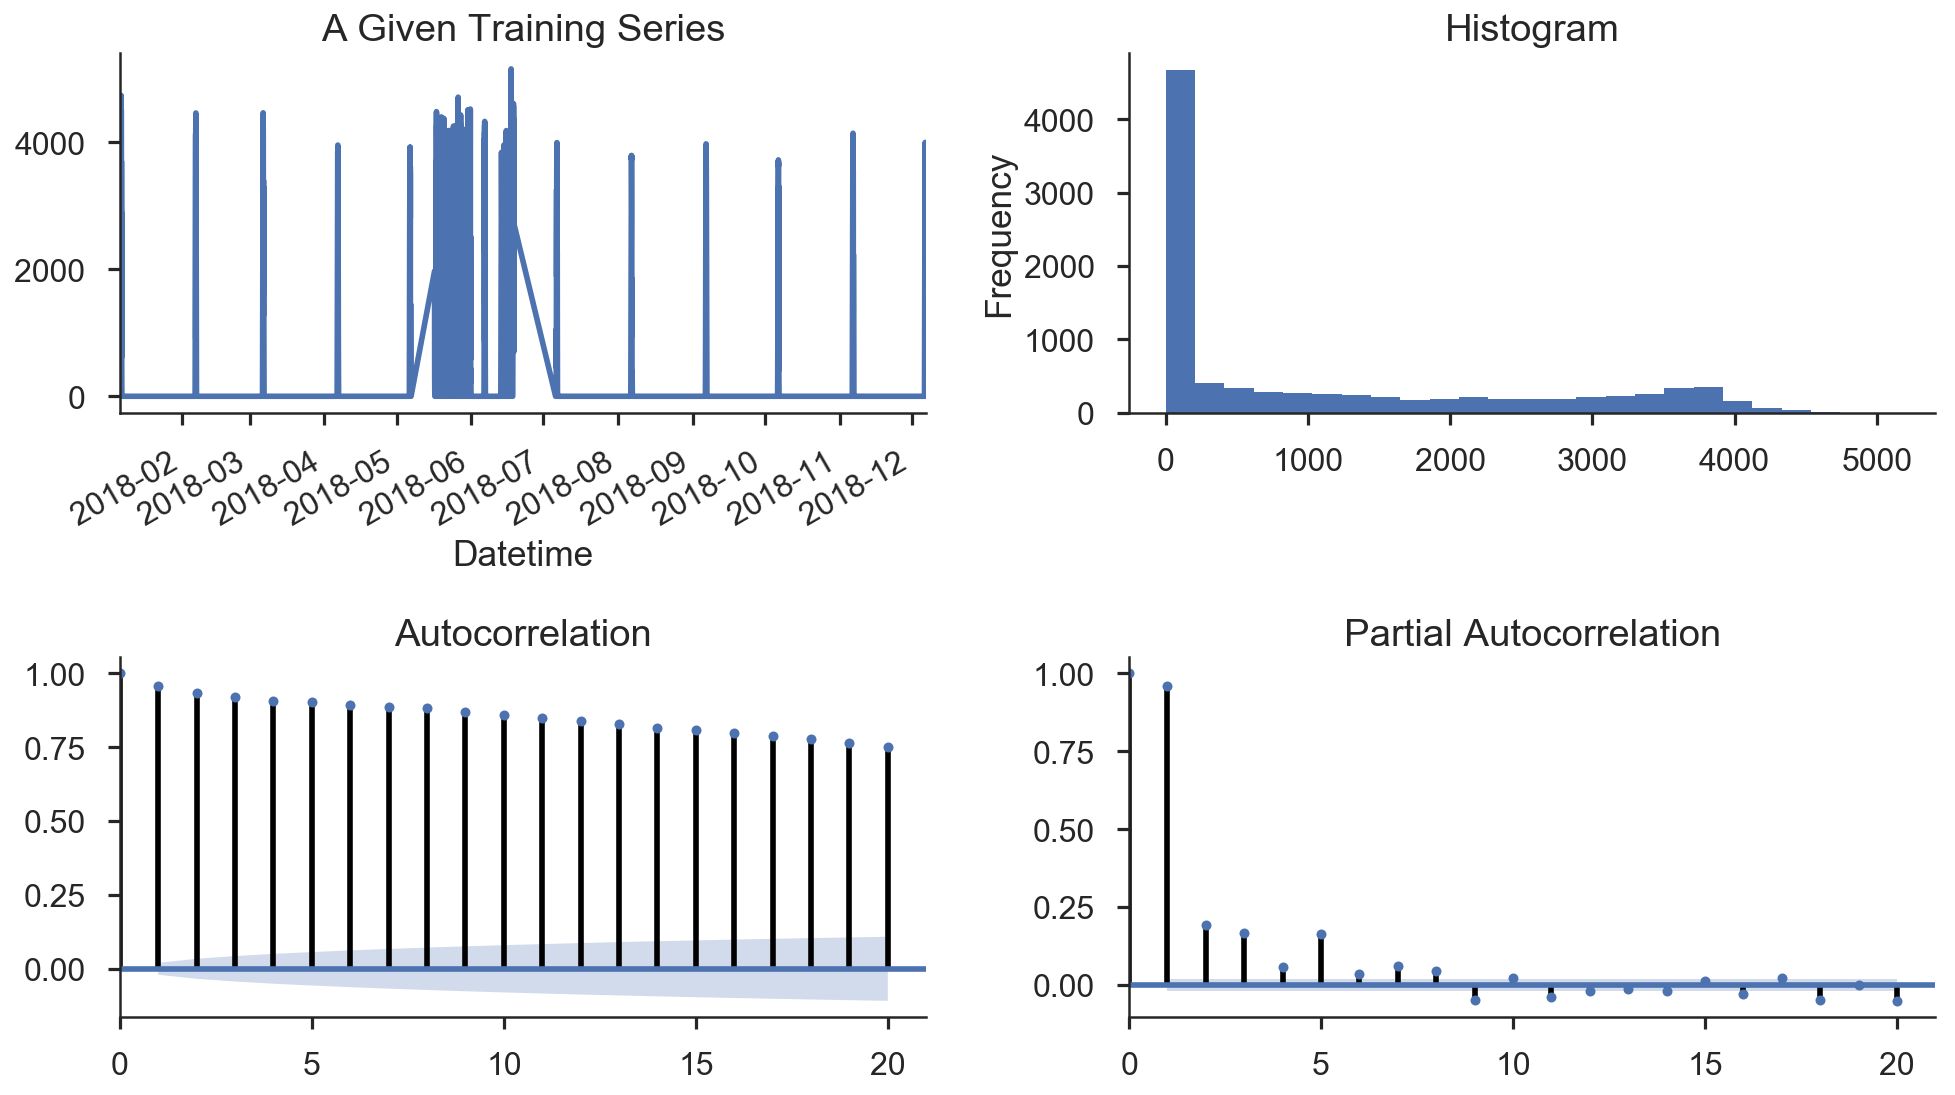

In [184]:
tsplot(ts_train, title='A Given Training Series', lags=20);

** Observations from the sample ACF and sample PACF (based on first 20 lags) **

- The sample autocorrelation gradually tails off.
- The sample partial autocorrelation does not exactly cut off at some lag $p$ but does not exactly tail off either.
- Based on these observations, we could attempt an ARIMA(2,0,0) model as a starting point, although other orders could serve as candidates as well.

In [129]:
ts_ax

NameError: name 'ts_ax' is not defined

In [ ]:
# Uncomment to install
# !pip install --pre statsmodels --upgrade

In [185]:
#Model Estimation

# Fit the model
arima200 = sm.tsa.SARIMAX(ts_train, order=(2,0,0))
model_results = arima200.fit()
model_results.summary()

C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                   P_ac   No. Observations:                 9470
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -69875.136
Date:                Mon, 18 Jun 2018   AIC                         139756.271
Time:                        19:07:35   BIC                         139777.739
Sample:                             0   HQIC                        139763.558
                               - 9470                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7816      0.004    198.899      0.000       0.774       0.789
ar.L2          0.1976      0.004     52.254      0.000       0.190       0.205
sigma2        1.5e+05    712.046    210.716      0.000    1.49e+05    1.51e+05
===================================================================================
Ljung-Box (Q):                      650.17   Jarque-Bera (JB):            130693.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Digression:

* In practice, one could *search* over a few models using the visual clues above as a starting point.  
* The code below gives one such example

In [186]:
import itertools

p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = sm.tsa.SARIMAX(ts_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

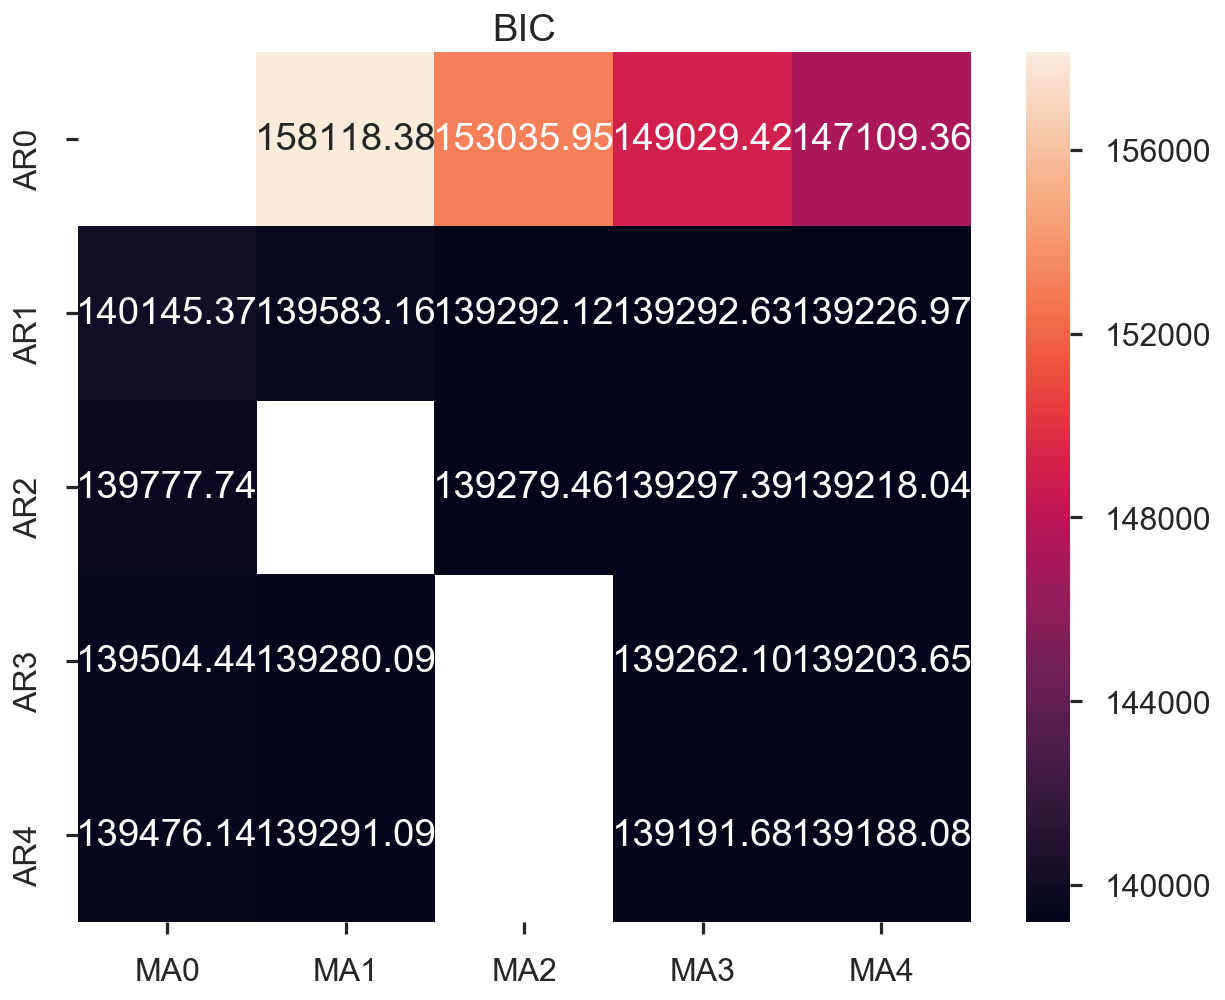

In [187]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');

In [188]:
# Alternative model selection method, limited to only searching AR and MA parameters

train_results = sm.tsa.arma_order_select_ic(ts_train, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

AIC (4, 4)
BIC (4, 4)


In [189]:
train_results

{'aic':              0            1            2            3            4
 0          nan 158104.06650 153014.47889 149000.80079 147073.57982
 1 140131.05609 139561.53619 139263.45799 139256.69808 139183.16326
 2 139756.26889 139253.11846 139243.58717 139254.41132 139167.30094
 3 139475.81538 139244.31224 139210.53260 139210.85843 139146.14728
 4 139440.34333 139246.30017 139209.34597 139133.21339 139123.45002,
 'aic_min_order': (4, 4),
 'bic':              0            1            2            3            4
 0          nan 158118.37827 153035.94654 149029.42432 147109.35924
 1 140145.36786 139583.00384 139292.08152 139292.47751 139226.09857
 2 139777.73654 139281.74200 139279.36659 139297.34662 139217.39213
 3 139504.43892 139280.09166 139253.46790 139260.94962 139203.39435
 4 139476.12275 139289.23548 139259.43716 139190.46047 139187.85298,
 'bic_min_order': (4, 4)}

### 3.2 Model Diagnostic Checking

* Conduct visual inspection of the residual plots
* Residuals of a well-specified ARIMA model should mimic *Gaussian white noises*: the residuals should be uncorrelated and distributed approximated normally with mean zero and variance $n^{-1}$
* Apparent patterns in the standardized residuals and the estimated ACF of the residuals give an indication that the model need to be re-specified
* The *results.plot_diagnostics()* function conveniently produce several plots to facilitate the investigation.
* The estimation results also come with some statistical tests

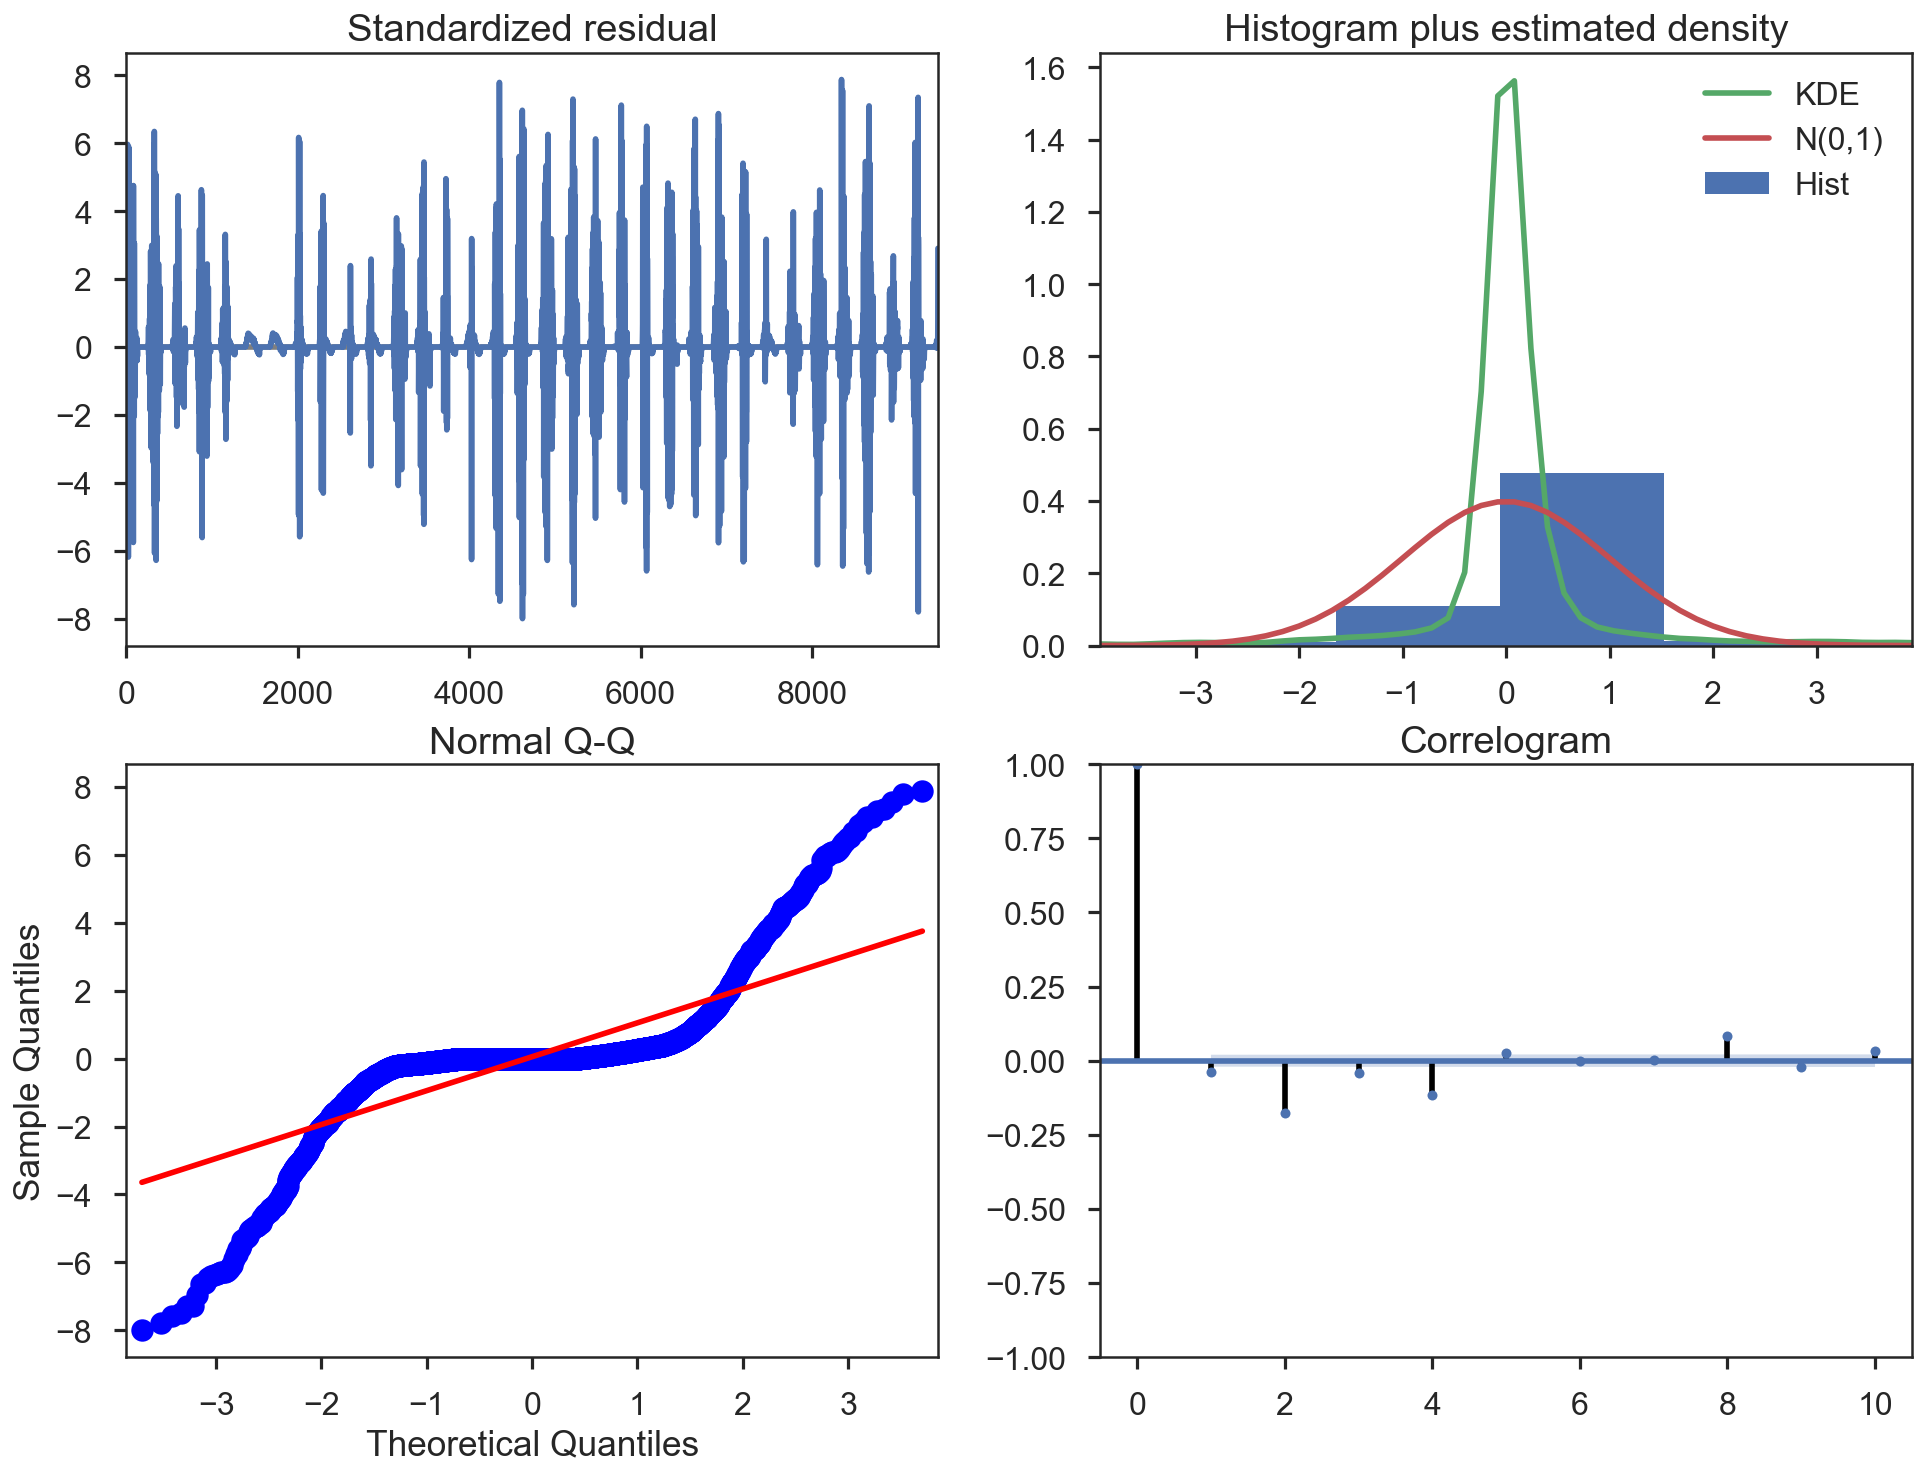

In [190]:
# Residual Diagnostics
# The plot_diagnostics function associated with the estimated result object produce a few plots that allow us 
# to examine the distribution and correlation of the estimated residuals

model_results.plot_diagnostics(figsize=(16, 12));

### 3.2.1 Formal testing

** More information about the statistics under the parameters table, tests of standardized residuals **

#### Test of heteroskedasticity
- http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity

#### Test of normality (Jarque-Bera)
- http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality

#### Test of serial correlation (Ljung-Box)
- http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation

In [191]:
# Re-run the above statistical tests, and more. To be used when selecting viable models.

het_method='breakvar'
norm_method='jarquebera'
sercor_method='ljungbox'

(het_stat, het_p) = model_results.test_heteroskedasticity(het_method)[0]
norm_stat, norm_p, skew, kurtosis = model_results.test_normality(norm_method)[0]
sercor_stat, sercor_p = model_results.test_serial_correlation(method=sercor_method)[0]
sercor_stat = sercor_stat[-1] # last number for the largest lag
sercor_p = sercor_p[-1] # last number for the largest lag

# Run Durbin-Watson test on the standardized residuals.
# The statistic is approximately equal to 2*(1-r), where r is the sample autocorrelation of the residuals.
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2.
# This statistic will always be between 0 and 4. The closer to 0 the statistic,
# the more evidence for positive serial correlation. The closer to 4,
# the more evidence for negative serial correlation.
# Essentially, below 1 or above 3 is bad.
dw = sm.stats.stattools.durbin_watson(model_results.filter_results.standardized_forecasts_error[0, model_results.loglikelihood_burn:])

# check whether roots are outside the unit circle (we want them to be);
# will be True when AR is not used (i.e., AR order = 0)
arroots_outside_unit_circle = np.all(np.abs(model_results.arroots) > 1)
# will be True when MA is not used (i.e., MA order = 0)
maroots_outside_unit_circle = np.all(np.abs(model_results.maroots) > 1)

print('Test heteroskedasticity of residuals ({}): stat={:.3f}, p={:.3f}'.format(het_method, het_stat, het_p));
print('\nTest normality of residuals ({}): stat={:.3f}, p={:.3f}'.format(norm_method, norm_stat, norm_p));
print('\nTest serial correlation of residuals ({}): stat={:.3f}, p={:.3f}'.format(sercor_method, sercor_stat, sercor_p));
print('\nDurbin-Watson test on residuals: d={:.2f}\n\t(NB: 2 means no serial correlation, 0=pos, 4=neg)'.format(dw))
print('\nTest for all AR roots outside unit circle (>1): {}'.format(arroots_outside_unit_circle))
print('\nTest for all MA roots outside unit circle (>1): {}'.format(maroots_outside_unit_circle))


Test heteroskedasticity of residuals (breakvar): stat=1.578, p=0.000

Test normality of residuals (jarquebera): stat=130693.728, p=0.000

Test serial correlation of residuals (ljungbox): stat=650.169, p=0.000

Durbin-Watson test on residuals: d=2.07
	(NB: 2 means no serial correlation, 0=pos, 4=neg)

Test for all AR roots outside unit circle (>1): True

Test for all MA roots outside unit circle (>1): True


In [213]:
ts_train.index = ts_train.index.astype(np.int64)
ts_test.index = ts_test.index.astype(np.int64)

In [215]:
pred_end

1526342400000000000

### 3.3 Model performance evaluation (in-sample fit)

ValueError: Prediction must have `end` after `start`.

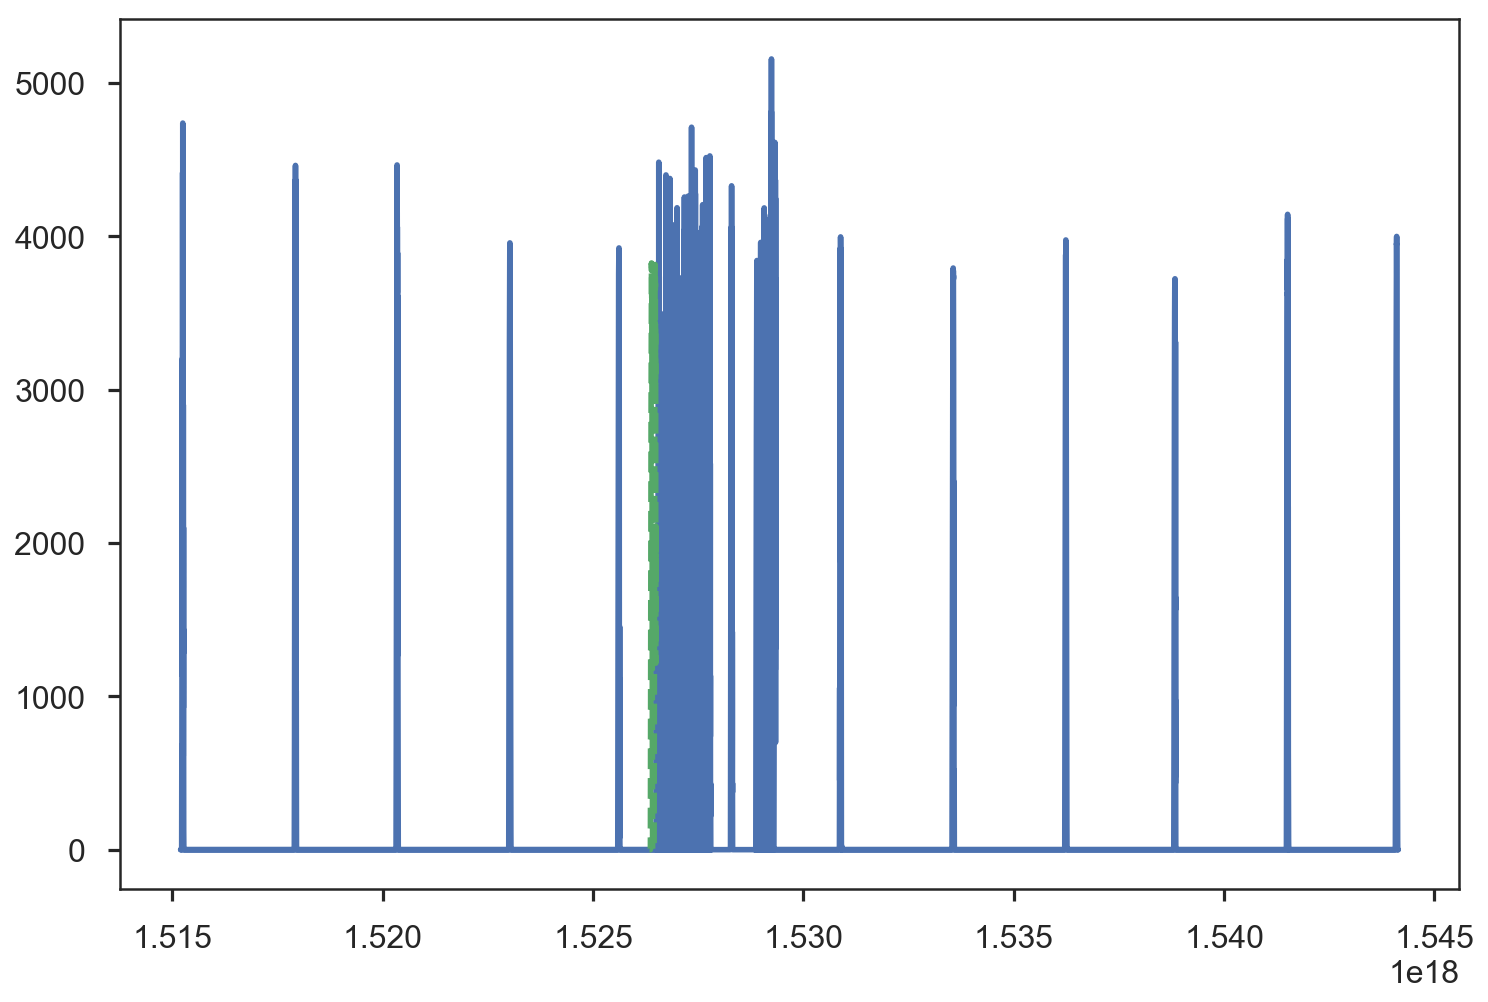

In [216]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    
ax1.plot(ts_train, label='In-sample data', linestyle='-')
# subtract 1 only to connect it to previous point in the graph
ax1.plot(ts_test, label='Held-out data', linestyle='--')

# yes DatetimeIndex
pred_begin = ts_train.index[model_results.loglikelihood_burn]
pred_end = ts_test.index[-1]
pred = model_results.get_prediction(start=pred_begin, end=pred_end)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

ax1.plot(pred_mean, 'r', alpha=.6, label='Predicted values')
ax1.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

In [211]:
def get_rmse(y, y_hat):
    '''Root Mean Square Error
    https://en.wikipedia.org/wiki/Root-mean-square_deviation
    '''
    mse = np.mean((y - y_hat)**2)
    return np.sqrt(mse)

def get_mape(y, y_hat):
    '''Mean Absolute Percent Error
    https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
    '''
    perc_err = (100*(y - y_hat))/y
    return np.mean(abs(perc_err))

def get_mase(y, y_hat):
    '''Mean Absolute Scaled Error
    https://en.wikipedia.org/wiki/Mean_absolute_scaled_error
    '''
    abs_err = abs(y - y_hat)
    dsum=sum(abs(y[1:] - y_hat[1:]))
    t = len(y)
    denom = (1/(t - 1))* dsum
    return np.mean(abs_err/denom)

In [196]:
rmse = get_rmse(ts_train, pred_mean.ix[ts_train.index])
print("RMSE: ", rmse)

mape = get_mape(ts_train, pred_mean.ix[ts_train.index])
print("MAPE: ", mape)

mase = get_mase(ts_train, pred_mean.ix[ts_train.index])
print("MASE: ", mase)

NameError: name 'pred_mean' is not defined

### 3.4 Forecasting and forecast evaluation

In [ ]:
rmse = get_rmse(ts_test, pred_mean.ix[ts_test.index])
print(rmse)

mape = get_mape(ts_test, pred_mean.ix[ts_test.index])
print(mape)

mase = get_mase(ts_test, pred_mean.ix[ts_test.index])
print(mase)

### Exericse 3:



In [ ]:
# Import the csv file containing the series for the analysis

# Step 1a: Read the data series
filename_ts = 'data/series2.csv'
series2_df = pd.read_csv(filename_ts, index_col=0, parse_dates=[0])

# Step 1b: Create the training and testing series before analyzing the series

n_sample = series2_df.shape[0]

n_train=int(0.95*n_sample)+1
n_forecast=n_sample-n_train

series2_train = series2_df.iloc[:n_train]['value']
series2_test  = series2_df.iloc[n_train:]['value']
print(series2_train.shape)
print(series2_test.shape)
print("Training Series:", "\n", series2_train.tail(), "\n")
print("Testing Series:", "\n", series2_test.head())

In [ ]:
# Step 2a: Examine the basic structure of the data
print("Data shape:", series2_train.shape, "\n")
print("First 5 observations of the data series:", "\n", series2_train.head(), "\n")
print("Last 5 observations of the data series:", "\n", series2_train.tail())

In [ ]:
# Step 2b: Examine the series and use the visuals as clues for the choice of the orders of the ARIMA model
# Choose the number of lags you would like to display. Pick a number that is at least 20.

# tsplot(series2_train, title='Series 2', lags=?);

tsplot(series2_train, title='Series 2', lags=YOUR_CODE_HERE);

In [ ]:
# Step 2c: Conduct any necessary transformations (such as natural log, difference, difference in natural log, etc )
# and repeat Step 2b


In [ ]:
# Step 3: Estimate an non-Seasonal ARIMA model
# Note: you will have to pick the orders (p,d,q)

# ex3_mod = sm.tsa.statespace.SARIMAX(series2_train, order=(?,?,?))
ex3_mod = sm.tsa.statespace.SARIMAX(series2_train, order=())
ex3_arima_fit = ex3_mod.fit()
print(ex3_arima_fit.summary())

# Discuss your results

In [ ]:
# Step 4: Conduct model diagnostic check

ex3_arima_fit.plot_diagnostics(figsize=(16, 12));

# Discuss these plots

In [ ]:
# Step 5: Do a 5-step ahead forecast

# ... codes need to be adjusted

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    
ax1.plot(series2_train, label='In-sample data', linestyle='-')
# subtract 1 only to connect it to previous point in the graph
ax1.plot(series2_test, label='Held-out data', linestyle='--')

# yes DatetimeIndex
pred_begin = series2_train.index[ex3_arima_fit.loglikelihood_burn]
pred_end = series2_test.index[-1]
pred = ex3_arima_fit.get_prediction(start=pred_begin.strftime('%Y-%m-%d'),
                                    end=pred_end.strftime('%Y-%m-%d'))
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

ax1.plot(pred_mean, 'r', alpha=.6, label='Predicted values')
ax1.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

## Discuss the results.  How does your forecast look?